In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels (0 to 9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Input layer
    Dense(128, activation='relu'),         # Hidden layer 1
    Dense(64, activation='relu'),          # Hidden layer 2
    Dense(10, activation='softmax')        # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


2025-08-11 23:33:09.038773: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-11 23:33:09.050383: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-11 23:33:09.189270: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-11 23:33:09.339025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754933589.441257   85958 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754933589.47

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8645 - loss: 0.4588 - val_accuracy: 0.9658 - val_loss: 0.1133
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9632 - loss: 0.1173 - val_accuracy: 0.9747 - val_loss: 0.0885
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9784 - loss: 0.0724 - val_accuracy: 0.9742 - val_loss: 0.0997
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9708 - val_loss: 0.1014
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0379 - val_accuracy: 0.9763 - val_loss: 0.0881
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0998
Test accuracy: 0.9753999710083008


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted digit: 9


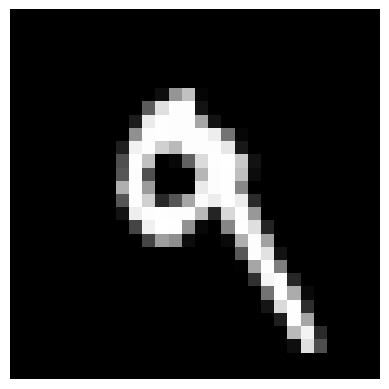

In [13]:

# Pick one test image

test_image = x_test[7] 

prediction = model.predict(test_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)

plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()